In [4]:
# 在 Jupyter 单元格里运行
!pip install "numpy<2.0" "opencv-python==4.10.0.84"


  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (114 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 17.4 MB/s eta 0:00:0000:0100:01
Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
  Attempting uninstall: opencv-python━━━━━━━━━━━ 0/2 [numpy]
    Found existing installation: opencv-python 4.12.0.882 [numpy]
    Uninstalling opencv-python-4.12.0.88:━━━ 0/2 [numpy]
      Successfully uninstalled opencv-python-4.12.0.880/2 [numpy]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [opencv-python]0m [opencv-python]


In [134]:
import numpy as np
from skimage import data, img_as_ubyte,img_as_float
from skimage.filters import rank
from skimage.morphology import footprint_rectangle
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from scipy.signal import convolve2d

In [113]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

fold_path=Path('/Users/xiaogaodelaogong/Desktop/image process/OCT_Dataset/ann_dir')
y_files = sorted(fold_path.glob("*.tif"))
print(f"找到 {len(y_files)} 个 TIF 文件")
fold_path=Path('/Users/xiaogaodelaogong/Desktop/image process/OCT_Dataset/img_dir')
x_files= sorted(fold_path.glob("*.tif"))
print(f"找到 {len(x_files)} 个 TIF 文件")

找到 10 个 TIF 文件
找到 10 个 TIF 文件


In [114]:

imgx_list=[]
num_img = len(x_files)
for i in range (num_img):
    img = cv2.imread(str(x_files[i]), cv2.IMREAD_UNCHANGED)
    imgx_list.append(img)
    print(f"{i+1}/{num_img} 图像形状: {img.shape}, 数据类型: {img.dtype}")

1/10 图像形状: (412, 742), 数据类型: uint8
2/10 图像形状: (428, 772), 数据类型: uint8
3/10 图像形状: (415, 766), 数据类型: uint8
4/10 图像形状: (426, 716), 数据类型: uint8
5/10 图像形状: (424, 511), 数据类型: uint8
6/10 图像形状: (432, 755), 数据类型: uint8
7/10 图像形状: (397, 766), 数据类型: uint8
8/10 图像形状: (425, 764), 数据类型: uint8
9/10 图像形状: (495, 765), 数据类型: uint8
10/10 图像形状: (434, 764), 数据类型: uint8


[[  0   0  10 ... 142 132 132]
 [  0   0  25 ... 151 146 143]
 [  7   7  18 ... 140 145 151]
 ...
 [119 113 129 ...  58  70  71]
 [116 109 129 ...  38  69  78]
 [118 106 125 ...  46  68  76]]


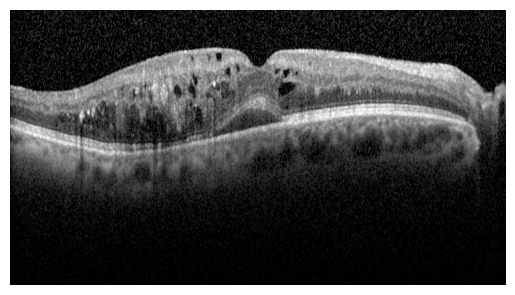

In [115]:
print(imgx_list[0][100:150, 100:150])
fig=plt.figure()
fig.add_subplot(1,1,1)
plt.imshow(imgx_list[0],cmap='gray')
plt.axis('off')
plt.show()

## Define noise_filter

In [119]:
def median_filter (img):
    im_median_list=[]
    square_control=[3,5,7]
    
    for i in square_control:
        im_median = rank.median(img, footprint=footprint_rectangle((i, i)))
        im_median_list.append(im_median)
        
    return im_median_list


In [120]:
# def gaussian_filter(img):
#     img_gaussian=gaussian(img,sigma=5)
#     return img_gaussian
    

#### #guassian_filter is not suitable for this task,because noise reduction simultaneously blurs the edges and internal structures of the retina

In [150]:
def bilateral_filter(img):
    bilateral = cv2.bilateralFilter(img, d=7, sigmaColor=30, sigmaSpace=10)
    return bilateral

In [151]:
img=imgx_list[0]
img_median = median_filter(img)

In [152]:
# img=imgx_list[0]
# img_gaussian=gaussian_filter(img)

In [153]:
img=imgx_list[0]
img_bilateral=bilateral_filter(img)

In [154]:
# fig=plt.figure()
# fig.add_subplot(1,1,1)
# plt.imshow(img_gaussian,cmap='gray')
# plt.axis('off')
# plt.show()

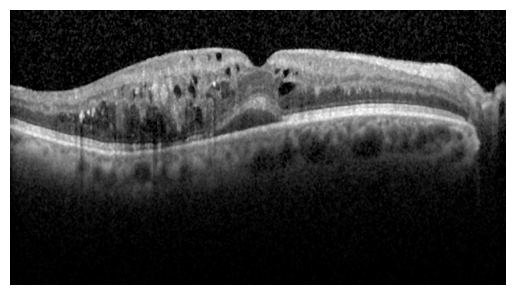

In [155]:
fig=plt.figure()
fig.add_subplot(1,1,1)
plt.imshow(img_median[0],cmap='gray')
plt.axis('off')
plt.show()

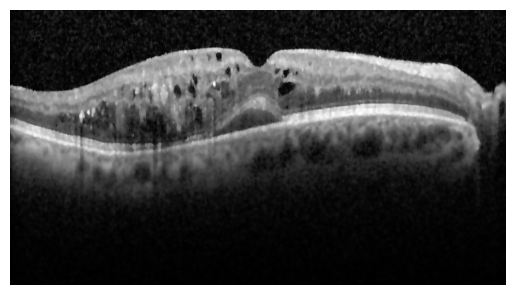

In [156]:
fig=plt.figure()
fig.add_subplot(1,1,1)
plt.imshow(img_bilateral,cmap='gray')
plt.axis('off')
plt.show()

[[  0   0   0 ... 142 132 143]
 [  0   7   0 ... 146 143 144]
 [  7   7   0 ... 146 145 145]
 ...
 [113 116 129 ...  63  71  70]
 [113 118 129 ...  49  69  69]
 [113 118 125 ...  46  68  66]]
[[ 0.00037438  0.00049225  0.0005858  ... -0.00261696 -0.00301502
  -0.00334441]
 [ 0.00052627  0.00065819  0.00075794 ... -0.00365613 -0.00389858
  -0.00406327]
 [ 0.0007372   0.00088288  0.00098918 ... -0.00439982 -0.00447154
  -0.00446693]
 ...
 [ 0.00175478  0.00154396  0.00123276 ...  0.00302798  0.0029845
   0.0030069 ]
 [ 0.00138671  0.00115041  0.00079832 ...  0.00314612  0.00310955
   0.00311748]
 [ 0.00098021  0.00070878  0.00030351 ...  0.00310992  0.00307808
   0.00307291]]


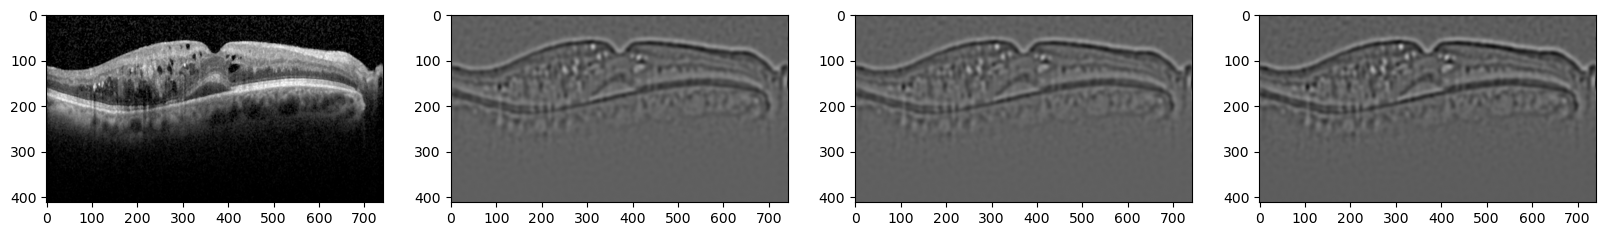

In [141]:

print(img_median[0][100:150,100:150])
laplacian_3 = np.array([[0,  1,  0],
                         [1, -4,  1],
                         [0,  1,  0]])


laplacian_8 = np.array([[1,  1,  1],
                        [1, -8,  1],
                        [1,  1,  1]])


laplacian_5 = np.array([[0, 0,  1, 0, 0],
                        [0, 1,  2, 1, 0],
                        [1, 2, -16, 2, 1],
                        [0, 1,  2, 1, 0],
                        [0, 0,  1, 0, 0]])


imf_3 = convolve2d(img, laplacian_3, mode='same', boundary='symm')
imf_8 = convolve2d(img, laplacian_8, mode='same', boundary='symm')
imf_5 = convolve2d(img, laplacian_5, mode='same', boundary='symm')
print(imf_3[100:150,100:150])
im_list=[img_median[0],imf_3,imf_8,imf_5]

fig = plt.figure(figsize=(20, 6))

for i,j in enumerate(im_list):
    ax = fig.add_subplot(1, len(im_list), i+1)
    p = plt.imshow(j,cmap='gray')


In [124]:
img=img_gaussian
laplacin=gaussian_filter(img)

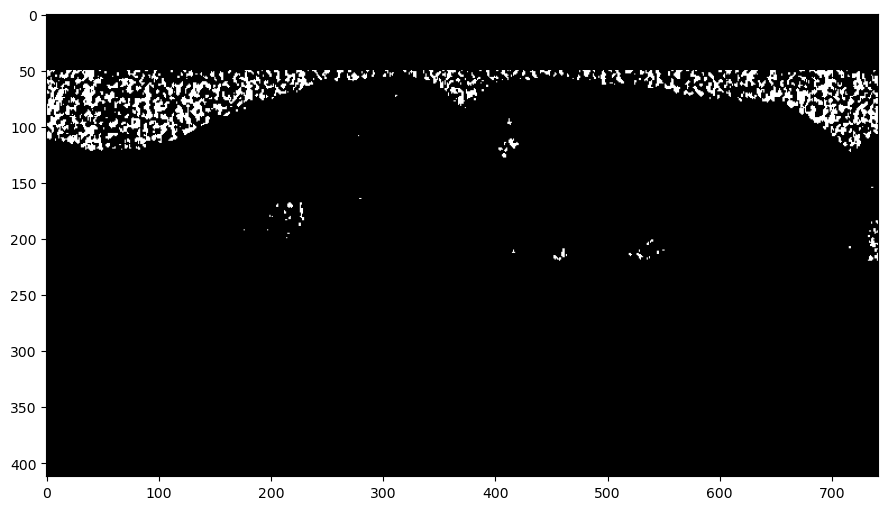

In [163]:
from skimage.filters import sobel

gy = sobel(img_median[0])  
row_mean = gy.mean(axis=1)  
top = np.argmax(row_mean[:int(0.5*len(row_mean))])       # 上边界
bottom = np.argmax(row_mean[int(0.5*len(row_mean)):]) + int(0.5*len(row_mean))  # 下边界

roi = np.zeros_like(img, dtype=bool)
roi[top-10:bottom+10, :] = True 
mask = (img_median[0] < 0.7) & roi

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(1, 1, 1)
p = plt.imshow(mask,cmap='gray')